## Titanic Data Set - Kaggle 

In [29]:
#%notebook "C:/Users/whitf/Documents/Python Scripts/my portfolio/kaggle/Titanic Machine Learning/Titanic_Dataset"

In [30]:
# load initial packages 
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy import stats
#import pandas_profiling
import random

In [31]:
# load data sets and change to lowercase 

train = pd.read_csv("C:/Users/whitf/Documents/Python Scripts/my portfolio/kaggle/Titanic Machine Learning/all/train.csv")
train.columns = train.columns.str.lower() 

#test = pd.read_csv("C:/Users/whitf/Documents/Python Scripts/my portfolio/kaggle/Titanic Machine Learning/all/test.csv")
#test.columns = test.columns.str.lower() 

In [32]:
# plot with Matplotlib 
%matplotlib inline
rcParams['figure.figsize'] = 5,4 
sns.set_style('whitegrid')

In [33]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Data Understanding:  Getting Familiar with the Data Set 

In [34]:
# What is the data size? Observations and columns?  
train.shape

(891, 12)

In [35]:
# What does the data look like? 
train.head(n=5)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
# What are the data types? 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
passengerid    891 non-null int64
survived       891 non-null int64
pclass         891 non-null int64
name           891 non-null object
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
ticket         891 non-null object
fare           891 non-null float64
cabin          204 non-null object
embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [37]:
# What does a five figure summary look like? High level snapshot of the data? 
# five number summary of numerical values 
train.describe() 

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Target Variable 

The dichotomous target variable, Survived, reveals the data set is imbalanced. Surviving and non-surviving persons are at 0.38 and 0.62 respectively.  

In [38]:
# What are we predicting? What is the target?  Is there enough signal for a decent prediction model? 

survived_prop = pd.crosstab(index = train["survived"], columns="Proportion") #crosstab & count
(survived_prop/survived_prop.sum()).round(2).transpose() #imbalanced data set 

survived,0,1
col_0,,
Proportion,0.62,0.38


## Data Quality

#### Duplicates

Routine check to ensure only unique instances are considered.  

In [39]:
# Are there any duplicate rows?
# check for duplicate rows 
train["duplicate_rows"]= train.duplicated()
train['duplicate_rows'].sum()

0

Observe and quantify unique values in each variable.   

In [40]:
# How many distinct values per variable are there in the data set overall? 
# unique values in the dataset
def distinct_values(x):
    return len(train[x].unique())

sum_distinct = { x: distinct_values(x) for x in train.columns}
sum_distinct    

{'passengerid': 891,
 'survived': 2,
 'pclass': 3,
 'name': 891,
 'sex': 2,
 'age': 89,
 'sibsp': 7,
 'parch': 7,
 'ticket': 681,
 'fare': 248,
 'cabin': 148,
 'embarked': 4,
 'duplicate_rows': 1}

#### Missingness

Only two variables are noted as having missing values, Age and Cabin.  Since Age is only 0.20 there are a myriad of approaches to explore for addressing missingness. These options may range from using central tendency measures to a bootstrap resampling method.

The missingness for the variable, Cabin, appears to be more challenging to estimate because only 0.23 of the values are observed.  Central tendency metrics may be inadequate in this instance. Alternate approaches may include finding a similar/correlated variable or removing the variable all together from the data set given insufficient data.  


In [41]:
# What sparse data? Any missing values? If so then which? 

#np.count_nonzero(train.isnull().values) 
missing = train.isnull().sum()  # list null count per variable 
missing_proportion = train.isnull().mean().round(2) # list proportion missing per variable

# relative frequency 
pd.DataFrame(dict(missing = missing, missing_proportion = missing_proportion)).reset_index()

,index,missing,missing_proportion
0,passengerid,0,0.00
1,survived,0,0.00
2,pclass,0,0.00
3,name,0,0.00
4,sex,0,0.00
5,age,177,0.20
6,sibsp,0,0.00
7,parch,0,0.00
8,ticket,0,0.00
9,fare,0,0.00


The absence of data for Age, Embarked and Cabin appears to be missing at random. Observations do not reveal any obvious patterns. 

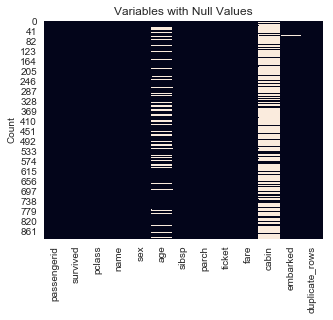

In [42]:
# Can we visualize the missing data? 

sns.heatmap(train.isnull(), cbar=False) # visualize missingness 
#plt.xlabel('Count')
plt.ylabel('Count')
plt.title('Variables with Null Values')
plt.show()

## Data Cleaning

### Age Variable 

Observe summary statistics for the variable, Age. 

In [43]:
train["age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

Explore variable imputation techniques to resolve missingness in Age variable.

##### Age Variable: Mean & Median Imputation 

Missing values are replaced by the central tendencies, mean and median.

In [44]:
# Remove null values? 
age = train["age"][train["age"].notnull()] # original variable remove nulls 

In [45]:
# Traditional imputation methods? 
train["age_imp_mean"] = train["age"].fillna(train["age"].mean())  # mean imputation 
train["age_imp_med"] = train["age"].fillna(train["age"].median()) # median imputation 

#### Age Variable: Interpolate Method

Missingness is addressed via linear model. 

In [46]:
# Variable imputation methods
train['age_imp_interp'] = train['age'].interpolate() 
#train['age_imp_interp'].isnull().sum()

This experimental approach minimizes the distrubance of the original distribution as noted in the statistics of the Age variable (top) versus the Age_imp_samp variable (bottom). This method requires a set seed for reproducibility. The mean for the original Age variable is 29.699 versus Age_imp_samp at 29.358. Standard deviation for Age is 14.526 versus Age_imp_samp at 14.839. 

#### Age Variable: Boostrap with Replacement Method 

In [47]:
### bootstrap method of replacing nulls with a known distribution, sample with replacement 
### seed is set for reproducibility 
### use for 25% missing over less 
### more than 25% should consider more robust methods

train['age_imp_samp'] = train['age'] # create new variable 
isnull = train.age_imp_samp.isnull() # identify missing 
sample = train.age_imp_samp.dropna().sample(isnull.sum(), replace=True,random_state=2).values # bootstrap replacement method
train.loc[isnull, 'age_imp_samp'] = sample 


In [48]:
train["age_imp_samp"].describe()

count    891.000000
mean      29.358305
std       14.839822
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: age_imp_samp, dtype: float64

#### Age Variable:  Imputation Method Comparisons

Variable imputations using central tendency are visibly noted by the extreme peaks in their distributions, age_imp_mean and age_imp_med. Their peaks appear to be modes around the age of 30. This is a best practices approach and the distribution is 
contrary to the Age variable's original distribution, noted by the dark blue line.  

Other methods, interplotation technique which uses a parameteric approach to missingness and boostrap with replacement technique appears to mirror the original variable's distribution more closely. The boostrap method is the density plot highlighted in yellow which has a similar distribution as the original variable. 

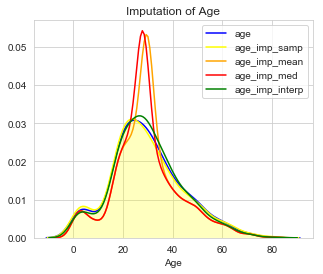

In [49]:
# plot each method against one another and observe the differences 

# density plots to observe distributions
density_p =sns.kdeplot(age, shade= False, color="blue") # original variable 
density_p =sns.kdeplot(train['age_imp_samp'], shade=True, color="yellow") #NAN imputed with bootstrap replacement method 
density_p =sns.kdeplot(train['age_imp_mean'], shade=False, color="orange") # imputed value 
density_p =sns.kdeplot(train['age_imp_med'], shade=False, color="red") # imputed value
density_p =sns.kdeplot(train['age_imp_interp'], shade=False, color="green") # imputed value
# Add title and axis names
plt.title('Imputation of Age')
plt.xlabel('Age')
plt.show()
#plt.gcf().clear()

To further analyze the differences between the bootstrap imputation method and the original variable's distribution, the five number summary is used. This reiterates the slight changes in distributions. 


In [50]:
#comparison of original vs imputed 
train["age"].describe(), train["age_imp_samp"].describe()

(count    714.000000
 mean      29.699118
 std       14.526497
 min        0.420000
 25%       20.125000
 50%       28.000000
 75%       38.000000
 max       80.000000
 Name: age, dtype: float64, count    891.000000
 mean      29.358305
 std       14.839822
 min        0.420000
 25%       20.000000
 50%       28.000000
 75%       38.000000
 max       80.000000
 Name: age_imp_samp, dtype: float64)

###  Embarked Variable

Out of 891 total rows, only two values are missing in the Embarked variable. The central tendency mode metric is suffice to remedy missing values for this categorical variable. 'S' is the most commonly reported value. 

In [51]:
# Embarked is a categorical variable how do you address missingness? 

# observe unique categories and their counts 
train["embarked"].value_counts() # find most freq

S    644
C    168
Q     77
Name: embarked, dtype: int64

After filling missing values with the mode. Let's verify that no missing values exist for this variable. 

In [52]:
# Be conservative and use the mode to replace the missingness or add a new category for missing values. 
train['embarked_imp'] = train['embarked'].replace(np.nan,'S')
train['embarked_imp'].isnull().sum()

0

### Cabin Variable

Due to the high level of missingness in the variable, Cabin, of 77% it is assumed its predictability is not favorable. As such, this variable will be removed or not considered in the modeling process.  

In [54]:
train.to_csv('C:/Users/whitf/Documents/Python Scripts/my portfolio/kaggle/Titanic Machine Learning/all/train_clean.csv')
